# Problem statement
### To predict agricultural Nitrous oxide $(N_2 O)$ emissions from intensively managed cropping systems.

# Assumptions
* **Use of Nitrogen based fertilizer** is proportional to the agricultural $N_2 O$ emissions


* **Rate of Nitrification process** in the soil is proportional to the agricultural $N_2 O$ emissions.


* **Soil profile, Water status, Aeration, Temperature** and **pH** are few factors that majoryly affect the rate of soil nitrification, hence contributing toward agricultural $N_2 O$ emissions.


* **Oxidation of Ammonia** to nitrate causes soil nitrification and hence, presence of soil Ammonia levels is proportional to $N_2 O$ emissions.

# Data Analysis

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [2]:
# Loading the data and viewing 5 sample observations
data = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx', sheet_name='Data')
data.sample(5)

Date  Year    Experiment   DataUse Replication     Month  \
2109 2010-04-30  2010       MCSE-T2   Testing          R3     April   
1074 2017-06-18  2017      BCSE_KBS  Building          R1      June   
1684 2008-04-23  2008       MCSE-T2   Testing          R1     April   
1468 2013-11-11  2013  Arlington WI  Building          R2  November   
1686 2008-04-23  2008       MCSE-T2   Testing          R3     April   

     Vegetation VegType       N2O  N_rate   PP2    PP7   AirT  DAF_TD  DAF_SD  \
2109      TRIAE  Annual -0.670000      87   0.0  19.31  19.41      10       1   
1074       Corn  Annual  4.356356     170  10.0  26.00  22.30      40     366   
1684       Corn  Annual  0.190000     147   0.0   0.00  18.51     390     365   
1468       Corn  Annual  1.298030     202   0.0  22.35  -1.20     199     136   
1686       Corn  Annual  0.570000     147   0.0   0.00  18.51     390     365   

      WFPS25cm        NH4        NO3        Clay        Sand       SOM  
2109  0.317040  13.217071  25.898929  169.833333  418.833333  1.823200  
1074  0.588677   5.360367  22.331253   62.500000  637.500000  1.174072  
1684  0.317040   6.174317   5.103283  162.500000  490.375000  1.496400  
1468  0.527044   5.843320   2.565379  230.000000   55.000000  4.500000  
1686  0.317040   7.203017   6.883400  169.833333  418.833333  1.823200

In [3]:
# Column names
columns = list(data.columns)
print("="*5, "\033[1m Column Names \033[0m", "="*5)
columns

=====  Column Names  =====


['Date',
 'Year',
 'Experiment',
 'DataUse',
 'Replication',
 'Month',
 'Vegetation',
 'VegType',
 'N2O',
 'N_rate',
 'PP2',
 'PP7',
 'AirT',
 'DAF_TD',
 'DAF_SD',
 'WFPS25cm',
 'NH4',
 'NO3',
 'Clay',
 'Sand',
 'SOM']

In [4]:
# Renaming columns for ease
columnNames_map = {
    'Date':'date',
    'Year':'year',
    'Experiment':'exp',
    'DataUse':'datause',
    'Replication':'rep',
    'Month':'month',
    'Vegetation':'veg',
    'VegType':'vegtype',
    'N2O':'n2o',
    'N_rate':'nrate',
    'PP2':'pp2',
    'PP7':'pp7',
    'AirT':'airt',
    'DAF_TD':'daftd',
    'DAF_SD':'dafsd',
    'WFPS25cm':'wfps',
    'NH4':'nh4',
    'NO3':'no3',
    'Clay':'clay',
    'Sand':'sand',
    'SOM':'som'
}
data = data.rename(columns=columnNames_map)
# Creating a copy of dataframe for analysis
df = data.copy()
df.head()

date  year       exp   datause rep     month   veg vegtype       n2o  \
0 2012-02-09  2012  BCSE_KBS  Building  R1  February  Corn  Annual  3.896742   
1 2012-02-10  2012  BCSE_KBS  Building  R1  February  Corn  Annual  2.190218   
2 2012-02-18  2012  BCSE_KBS  Building  R1  February  Corn  Annual  3.542594   
3 2012-02-19  2012  BCSE_KBS  Building  R1  February  Corn  Annual  3.342870   
4 2012-03-16  2012  BCSE_KBS  Building  R1     March  Corn  Annual  2.947778   

   nrate   pp2   pp7  airt  daftd  dafsd      wfps        nh4        no3  \
0    170  0.00  0.00  -2.0    276    241  0.666508  11.046340  22.940812   
1    170  0.00  0.00  -2.4    277    242  0.640608  11.008087  22.959578   
2    170  3.30  8.64   0.3    285    250  0.728085  10.831669  23.221928   
3    170  0.00  8.13  -3.8    286    251  0.686872  10.849792  23.271978   
4    170  1.02  8.39  17.6    312    277  0.716221  10.204748  24.206855   

   clay   sand       som  
0  62.5  637.5  1.174072  
1  62.5  637.5  1.174072  
2  62.5  637.5  1.174072  
3  62.5  637.5  1.174072  
4  62.5  637.5  1.174072

## Feature Information
#### Date >> date  
Gas Sampling days


#### Year >> year  
Calendar year


#### Experiment >> exp    
Long term experiments


#### DataUse >> datause  
Data to be used for training and testing


#### Replication >> rep  
Experimental replications


#### Month >> month  
Month of the year


#### Vegetation >> veg  
Crops used


#### VegType >> vegtype  
Periodicity of crop cultivation


#### N2O >> n2o  
Atmospheric Nitrous Oxide  concentration in ppb/yr


#### N_rate >> nrate  
Nitrogen fertilizer application rate in kg/ha


#### PP2 >> pp2  
Cumulative precipitation in the last two days before gas sampling in mm


#### PP7 >> pp7  
Cumulative precipitation in the last week before gas sampling in mm


#### AirT >> airt  
Mean daily air temperature in °C


#### DAF_TD >> daftd  
Days after top-dressed Nitrogen fertilization


#### DAF_SD >> dafsd  
Days after side-dressed Nitrogen fertilization


#### WFPS25cm: wfps  
Water filled pore space in the top 25cm soil layer. (Approximation of soil Oxygen limitation  


#### NH4 >> nh4  
Ammonium Nitrogen content in the top 25cm soil layer in kg/ha


#### NO3 >> no3  
Nitrate Nitrogen content in the top 25cm soil layer in kg/ha


#### Clay >> clay  
Clay content in g/kg


#### Sand >> sand  
Sand content in g/kg


#### SOM >> som  
Soil organic matter concentration in %

In [5]:
# Data information
print("="*10, "\033[1m Dataset Shape \033[0m", "="*10)
print("No of features: ", df.shape[0])
print("No of observations: ", df.shape[1], "\n")
print("="*10, "\033[1m Information Table \033[0m", "="*10)
df.info()

==========  Dataset Shape  ==========
No of features:  2246
No of observations:  21 

==========  Information Table  ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2246 non-null   datetime64[ns]
 1   year     2246 non-null   int64         
 2   exp      2246 non-null   object        
 3   datause  2246 non-null   object        
 4   rep      2246 non-null   object        
 5   month    2246 non-null   object        
 6   veg      2246 non-null   object        
 7   vegtype  2246 non-null   object        
 8   n2o      2246 non-null   float64       
 9   nrate    2246 non-null   int64         
 10  pp2      2246 non-null   float64       
 11  pp7      2246 non-null   float64       
 12  airt     2246 non-null   float64       
 13  daftd    2246 non-null   int64         
 14  dafsd    2246 non-null   int64         


##### Observations:
* There are missing values for "WFPS25cm", "NH4" and "NO3".
* Certain features are of type "Object" which requires correction.

In [6]:
# Changing dtypes of features with type 'Object'
for feat in [feat for feat in df.columns if df[feat].dtypes=='O']:
    before = df[feat].dtypes
    df[feat] = df[feat]. astype('category')
    after = df[feat].dtypes
    print(f"Datatype of \033[1m{feat}\033[0m converted from: \033[1m{before}\033[0m to \033[1m{after}\033[0m \n")

Datatype of exp converted from: object to category 

Datatype of datause converted from: object to category 

Datatype of rep converted from: object to category 

Datatype of month converted from: object to category 

Datatype of veg converted from: object to category 

Datatype of vegtype converted from: object to category 



In [7]:
# Observing the target
print("\033[1m Target datatype: \033[0m", df['n2o'].dtypes, "\n")

print("="*20, "\033[1m  Descriptive Stats of Target  \033[0m", "="*20)
print(pd.DataFrame(df['n2o']).describe().T.drop('count',axis=1))

# Plotting the target distribution
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=["Histogram", "Box Plot"]
                   )
# Histogram
fig.add_histogram(x=df['n2o'].unique(),
                  nbinsx=200,
                  row=1, col=1)
# Box plot
fig.add_box(y=df['n2o'].unique(),
            row=1, col=2)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(showlegend=False,
                  title=dict(text="Distribution of N2O in ppb/yr",
                             x=0.5),
                  template='ggplot2',
                  width=800, 
                  height=400,
                  margin=dict(l=0,
                              r=0,
                              b=0
                             )
                 )
fig.show()

 Target datatype:  float64 

====================   Descriptive Stats of Target   ====================
        mean        std       min       25%       50%       75%      max
n2o  7.46861  28.488257 -7.415297  0.504316  1.972058  5.187618  593.072


##### Observations:
* Negative values for N2O concentration.
* 75% of the data is within 1 std deviation from the mean.
* Heavily right skewed data
* Extreme outliers at 583 and 593.

In [8]:
# Visualizing negative values in n20

fig = make_subplots(1,2, x_title="Distribution of N2O less than 30 ppb/yr")

fig.add_histogram(x=df[df['n2o']<0]['n2o'], 
                  nbinsx=50,
                  row=1, col=1)

fig.add_histogram(x=df[df['n2o']<30]['n2o'], 
                  nbinsx=50,
                  row=1, col=2)

fig.update_yaxes(showgrid=False,
                zeroline=False)

fig.update_layout(width=800, height=350,
                  showlegend=False,
                  margin=dict(l=0, 
                              r=0,
                              t=0.01
                             )
                 )

Seems like there are a good amount of negative values for 'n2o'. These are due to the conversion of 'n2o' data between 0 and automated chamber's detection limit to 50% of the detection limit. Hence, we will add 'n2o' with the absolute of its lowest value to keep the minimum value at 0.

In [9]:
df['n2o'] = df['n2o'] + abs(np.min(df['n2o']))

In [10]:
# Checking distribution of 'n2o'
fig = px.box(x=df['n2o'].sort_values(), width = 400, height=300)
fig.update_layout(margin=dict(t=0, r=0, l=0, b=0), showlegend=False)
fig.show()

In [11]:
# Checking for missing values
print("="*20, "\033[1m  Checking for Missing values  \033[0m", "="*20)
total_missing = df.isnull().sum().sum()
missing_feat = [col for col in df.columns if df[col].isnull().sum()!=0]
if total_missing != 0:
    print("Total missing values in the dataset: ", total_missing)
    print("Features with missing values: ", missing_feat, "\n")
else:
    print("No missing values in the dataset")

# Checking duplicates
print("="*20, "\033[1m  Checking for duplicates  \033[0m", "="*20)
print("No of duplicate values in the dataset: ", df.duplicated().sum(), "\n")

# Checking for constant features
print("="*20, "\033[1m  Checking for constant features  \033[0m", "="*20)
total_constants = [col for col in df if df[col].nunique()==1]
if len(total_constants) != 0:
    print("No of constant features: ", len(total_constants))
    print("Constant features: ", total_constants, "\n")
else:
    print("No constant features in the dataset")

# Checking for features with variance < 0.1
print("="*20, "\033[1m Checking features with low variance \033[0m", "="*20)
low_var=[]
for col in df:
    try:
        if df[col].var()<0.1:
            low_var.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")
        
print("Features with variance < 0.1: ", low_var)

====================   Checking for Missing values   ====================
Total missing values in the dataset:  158
Features with missing values:  ['wfps', 'nh4', 'no3'] 

====================   Checking for duplicates   ====================
No of duplicate values in the dataset:  0 

====================   Checking for constant features   ====================
No of constant features:  1
Constant features:  ['vegtype'] 

====================  Checking features with low variance  ====================
Couldn't check date.  'DatetimeArray' does not implement reduction 'var' 

Couldn't check exp.  'Categorical' does not implement reduction 'var' 

Couldn't check datause.  'Categorical' does not implement reduction 'var' 

Couldn't check rep.  'Categorical' does not implement reduction 'var' 

Couldn't check month.  'Categorical' does not implement reduction 'var' 

Couldn't check veg.  'Categorical' does not implement reduction 'var' 

Couldn't check vegtype.  'Categorical' does not implem

In [12]:
# Dropping constant feature from the dataset
df = df.drop(columns='vegtype', axis=1)
df.columns

Index(['date', 'year', 'exp', 'datause', 'rep', 'month', 'veg', 'n2o', 'nrate',
       'pp2', 'pp7', 'airt', 'daftd', 'dafsd', 'wfps', 'nh4', 'no3', 'clay',
       'sand', 'som'],
      dtype='object')

## Missing Value Analysis

In [13]:
# Creating a dataframe of features with missing values
df_miss = df[missing_feat]
df_miss.head()

wfps        nh4        no3
0  0.666508  11.046340  22.940812
1  0.640608  11.008087  22.959578
2  0.728085  10.831669  23.221928
3  0.686872  10.849792  23.271978
4  0.716221  10.204748  24.206855

In [14]:
# Getting % missing values
print("% Missing values for wfps: ", round(100*df.isnull().sum()['wfps']/df.shape[0],2), "%\n")
print("% Missing values for nh4: ", round(100*df.isnull().sum()['nh4']/df.shape[0],2), "%\n")
print("% Missing values for no3: ", round(100*df.isnull().sum()['no3']/df.shape[0],2), "%\n")

% Missing values for wfps:  2.32 %

% Missing values for nh4:  3.38 %

% Missing values for no3:  1.34 %



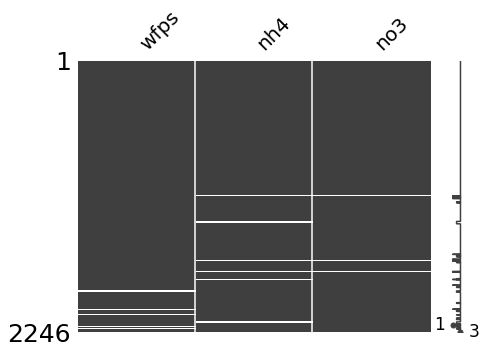

In [15]:
import missingno as msno

# Checking missing value matrix
msno.matrix(df_miss, fontsize=20, figsize=(7,5));

##### Observations:
* Some form of relationship can be observed in the missing values of 'nh4' and 'no3'     

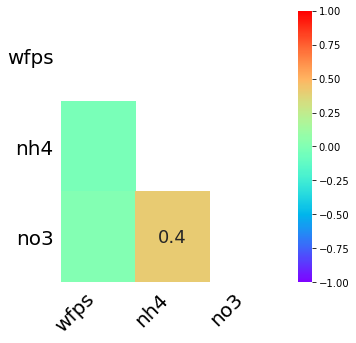

In [16]:
# Checking missing value heatmap for correlation
msno.heatmap(df_miss, cmap='rainbow', figsize=(5,5), fontsize=20);

##### Observation:
* Heatmap confirms the presence of relationship between missing values in 'nh4' and 'no3'. 
* Therefore, we can conclude that missing values in 'nh4' and 'no3' are not completely at random.
* In fact, soil nitrites (no3) are majorly formed by ammonia (nh4) decomposition. Hence, it can be assumed that the missing values in no3 is due to the missing values in nh4.

In [17]:
# Creating a list of features with no missing values
nonmiss = [col for col in df.columns if col not in missing_feat]

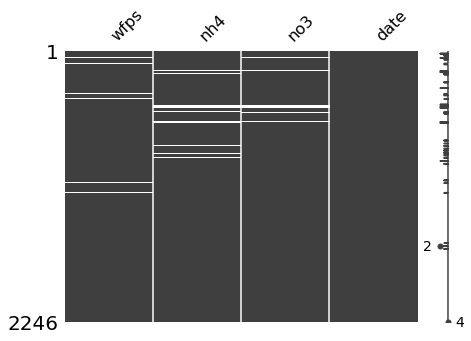

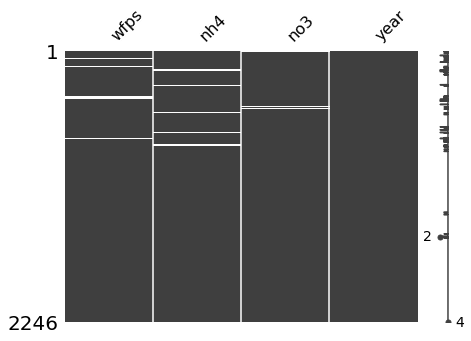

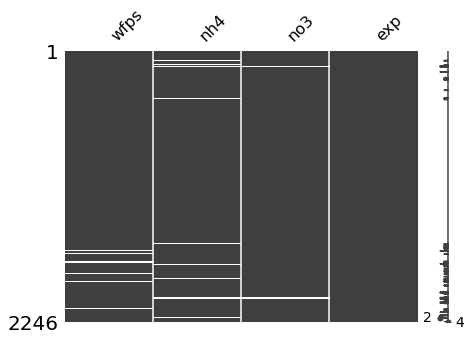

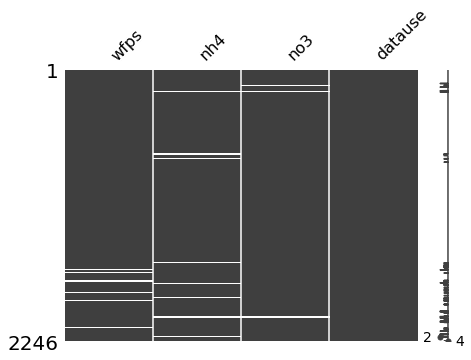

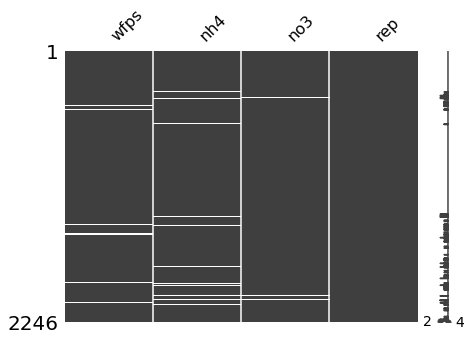

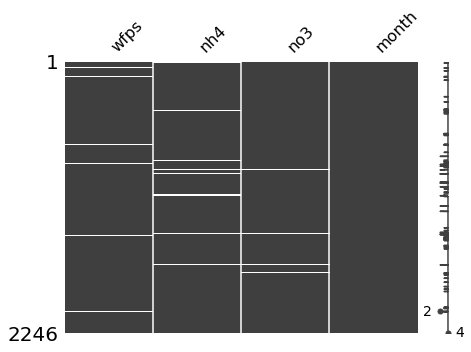

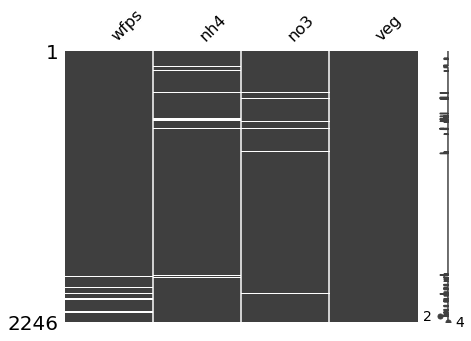

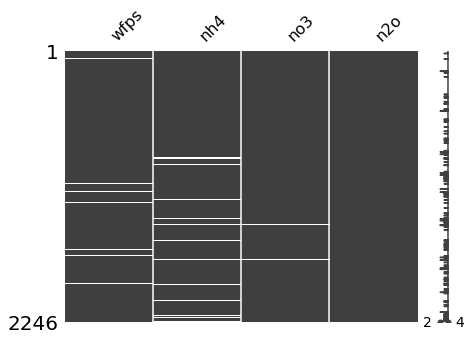

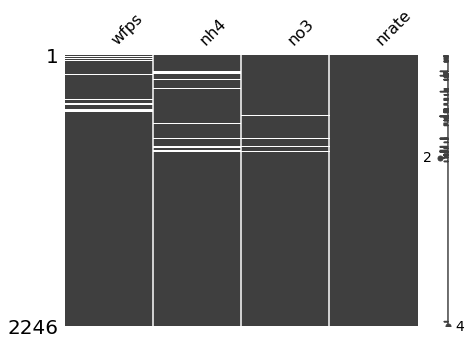

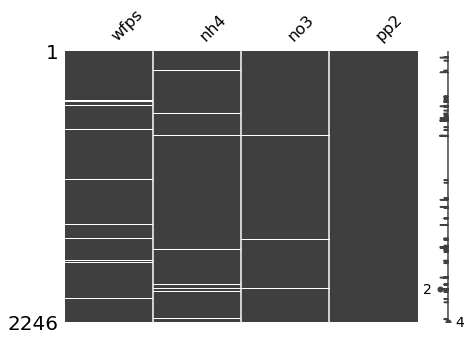

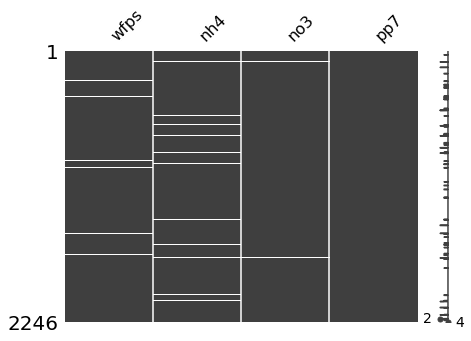

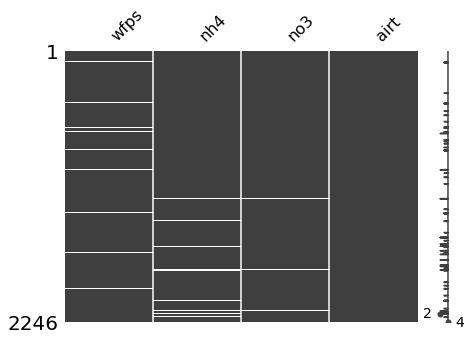

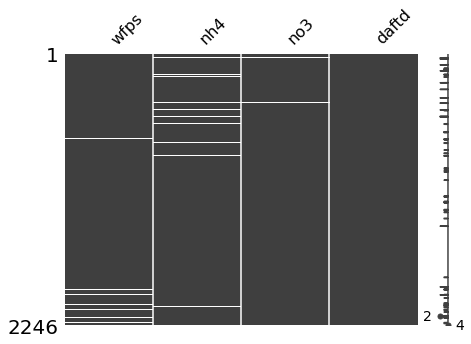

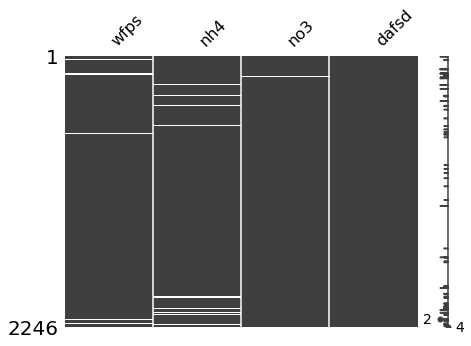

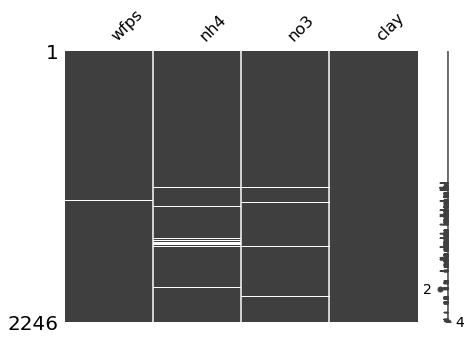

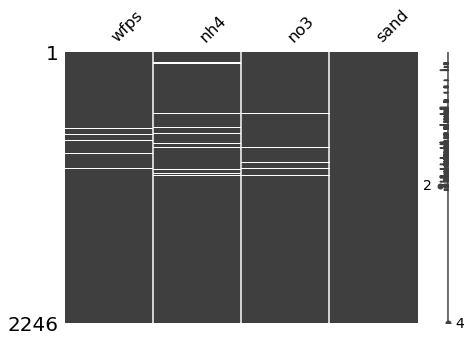

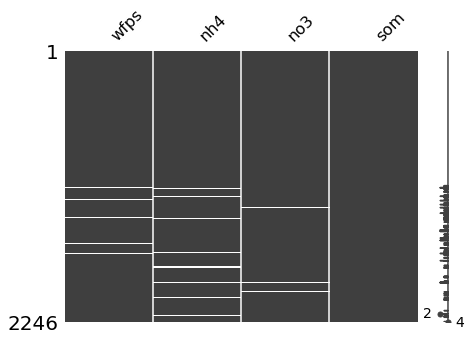

In [18]:
# Checking for relationship of missing values with other features

for col in nonmiss:
    try:
        df_temp = pd.concat([df_miss, df[col]], axis=1)
        msno.matrix(df_temp.sort_values(col), figsize=(7,5));
    except Exception as e:
        print("Failed: ", e)

##### Observations:
* 'wfps' shows some relationship with the feature 'clay' and hence we can conclude that the missing values in 'wfps' are not completely at random.
* Also, 'no3' exhibits a relationship with 'year' and 'dafsd'
* Hence, we can now conclude that all the missing data are not completely at random.

In [19]:
# Creating new features for visualizing the relationships in missing values
df1 = df.copy()

df1['wfps_missing'] = df1['wfps'].replace(np.nan, 'Missing')
df1['wfps_missing'] = np.where(df1['wfps_missing']=='Missing', 'Missing', 'Complete')

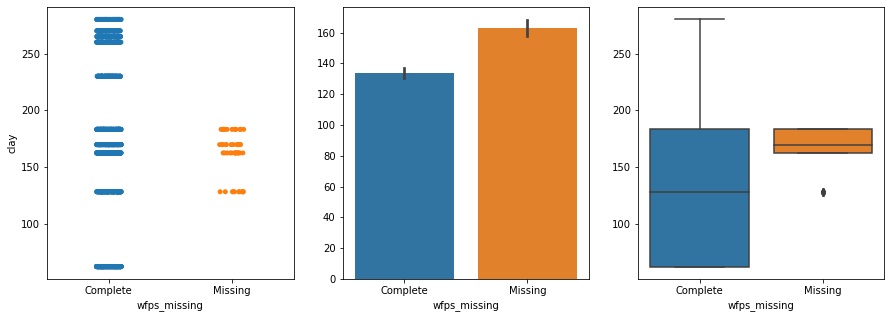

In [20]:
# Visualizing the relationship between wfps and clay
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
sns.stripplot(x=df1['wfps_missing'], y=df1['clay'])

ax2 = plt.subplot(1,3,2)
sns.barplot(x=df1['wfps_missing'], y=df1['clay'])
plt.ylabel("")

ax2 = plt.subplot(1,3,3)
sns.boxplot(x=df1['wfps_missing'], y=df1['clay'])
plt.ylabel("")

plt.show()

In [21]:
# Creating dataframes with missing and complete values for wfps
missing_wfps = df[df['wfps'].isna()]
complete_wfps = df[~df['wfps'].isna()]

In [22]:
# Grouping mean complete wfps wrt year
complete_wfps.groupby('clay')['wfps'].mean()

clay
62.500000     0.629925
128.333333    0.395081
162.500000    0.313202
169.833333    0.321753
183.250000    0.293342
230.000000    0.551341
260.000000    0.548297
265.000000    0.570859
270.000000    0.566406
280.000000    0.582698
Name: wfps, dtype: float64

In [23]:
# Grouping missing wfps wrt year
missing_wfps.groupby('clay')['wfps'].mean()

clay
128.333333   NaN
162.500000   NaN
169.833333   NaN
183.250000   NaN
Name: wfps, dtype: float64

##### Observations
* There is a clear relationship between 'clay' and missing values in 'wfps'.


* Missing values in no3 range between 130 and 190g/kg of clay.


* Error bars in bar plot doesn't overlap indicating some form of significance in the relationship.


* Mean missing values are found to lie around 170g/kg of clay with a lower outlier value.


* The mean value of wfps for around 170g/kg of clay is about 0.321753.


* Also, missing values are found for clay values of around 128, 162, 170 and 183.


* Hence, we can either replace all the mising values with 0.321753  **OR**


* With mean values of no3 from complete set corresponding to clay values of 128, 162, 170 and 183 which are: 0.395081, 0.313202, 0.321753 and 0.293342.


* Since there is not much difference in the values, we will replace the missing values in wfps with **0.321753**

In [24]:
# Creating a missing feature for no3 for visualization
df1['no3_missing'] = df1['no3'].replace(np.nan, 'Missing')
df1['no3_missing'] = np.where(df1['no3_missing']=='Missing', 'Missing', 'Complete')

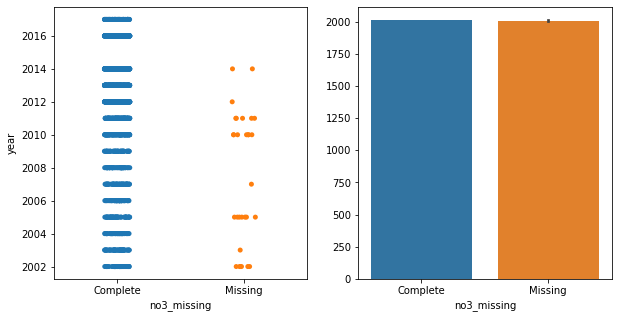

In [25]:
# Visualizing the relationship between no3 and year

plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
sns.stripplot(x=df1['no3_missing'], y=df1['year'])

ax2 = plt.subplot(1,2,2)
sns.barplot(x=df1['no3_missing'], y=df1['year'])
plt.ylabel("")

plt.show()

##### Observations:
* Not much relationship could be observed for missing values in 'no3' with respect to 'year'.

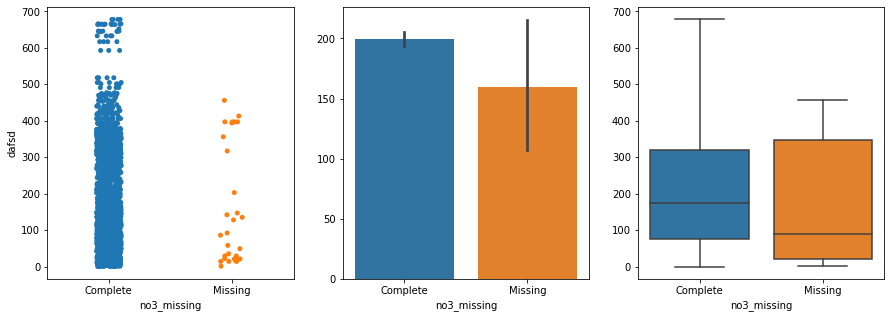

In [26]:
# Visualizing the relationship between no3 and dafsd
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
sns.stripplot(x=df1['no3_missing'], y=df1['dafsd'])

ax2 = plt.subplot(1,3,2)
sns.barplot(x=df1['no3_missing'], y=df1['dafsd'])
plt.ylabel("")

ax3 = plt.subplot(1,3,3)
sns.boxplot(x=df1['no3_missing'], y=df1['dafsd'])
plt.ylabel("")

plt.show()

Observations:
* Most of the missing values in no3 are to be found between 0 and 200 days after side-dressed Nitrogen feritilization.
* But the huge overlapping error bars indicate very low significance in the relationship.

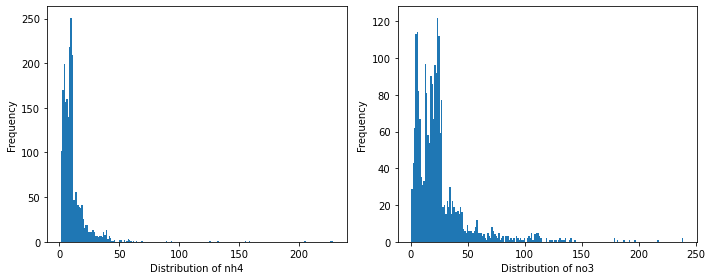

In [27]:
# Checking distribution of 'nh4' and 'no3'

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax1 = df['nh4'].plot.hist(bins=200)
plt.xlabel('Distribution of nh4')
plt.subplot(1,2,2)
ax1 = df['no3'].plot.hist(bins=200)
plt.xlabel('Distribution of no3')
plt.tight_layout()

##### Inference from Missing value analysis:
* "wfps", "nh4" and "no3" are not missing completely at random.
* Missing values in "wfps" has a significant relationship with clay values and hence the missing values in wfps can be replaced with **0.321753**
* Missing values in "nh4" and "no3" are significantly related with each other.
* There is no relationship to be found for missing values in "nh4" and "no3" with other features in the dataset.
* Since, no3 is a by-product of nh4 decomposition in the soil, it is safe to assume that missing values in 'no3' is a result of missing values in 'nh4'. Since, we don't have the actual reason for missing values in 'nh4', we cannot conclude whether its missing at random or not at random and hence we will proceed with mean imputation.

# Missing Value Imputation

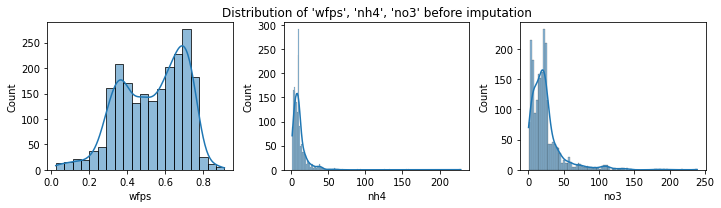

In [28]:
# Visualizing the distribution of features before imputation
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,3,1)
sns.histplot(df['wfps'], kde=True)
ax2 = plt.subplot(1,3,2)
sns.histplot(df['nh4'], kde=True)
plt.title("Distribution of 'wfps', 'nh4', 'no3' before imputation", 
          loc='center')
ax3 = plt.subplot(1,3,3)
sns.histplot(df['no3'], kde=True)
plt.tight_layout()

In [29]:
# Replacing missing values in 'wfps'
df['wfps'] = df['wfps'].fillna(0.321753)

# Replacing missing values in 'nh4' and 'no3' with median values
df['nh4'] = df['nh4'].fillna(np.mean(df['nh4']))
df['no3'] = df['no3'].fillna(np.mean(df['no3']))

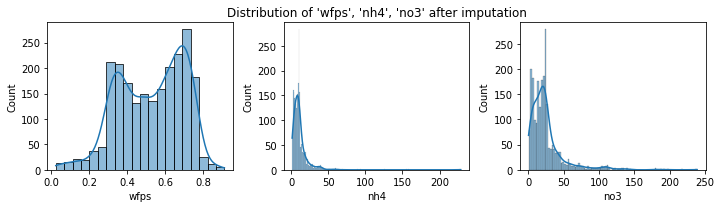

In [30]:
# Visualizing the distribution of features after imputation
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,3,1)
sns.histplot(df['wfps'], kde=True)
ax2 = plt.subplot(1,3,2)
sns.histplot(df['nh4'], kde=True)
plt.title("Distribution of 'wfps', 'nh4', 'no3' after imputation", 
          loc='center')
ax3 = plt.subplot(1,3,3)
sns.histplot(df['no3'], kde=True)
plt.tight_layout()

In [31]:
df.head(3)

date  year       exp   datause rep     month   veg        n2o  nrate  \
0 2012-02-09  2012  BCSE_KBS  Building  R1  February  Corn  11.312038    170   
1 2012-02-10  2012  BCSE_KBS  Building  R1  February  Corn   9.605514    170   
2 2012-02-18  2012  BCSE_KBS  Building  R1  February  Corn  10.957891    170   

   pp2   pp7  airt  daftd  dafsd      wfps        nh4        no3  clay   sand  \
0  0.0  0.00  -2.0    276    241  0.666508  11.046340  22.940812  62.5  637.5   
1  0.0  0.00  -2.4    277    242  0.640608  11.008087  22.959578  62.5  637.5   
2  3.3  8.64   0.3    285    250  0.728085  10.831669  23.221928  62.5  637.5   

        som  
0  1.174072  
1  1.174072  
2  1.174072

We will drop 'date', 'year', 'exp', 'datause' and 'rep' column as they don't provide much information towards predicting 'n2o' values.

In [32]:
df = df.drop(columns=['date', 'year', 'exp', 'datause', 'rep'], axis=1)
df.head(3)

month   veg        n2o  nrate  pp2   pp7  airt  daftd  dafsd      wfps  \
0  February  Corn  11.312038    170  0.0  0.00  -2.0    276    241  0.666508   
1  February  Corn   9.605514    170  0.0  0.00  -2.4    277    242  0.640608   
2  February  Corn  10.957891    170  3.3  8.64   0.3    285    250  0.728085   

         nh4        no3  clay   sand       som  
0  11.046340  22.940812  62.5  637.5  1.174072  
1  11.008087  22.959578  62.5  637.5  1.174072  
2  10.831669  23.221928  62.5  637.5  1.174072

# Splitting data based on data types for further analysis

In [33]:
# Numerical features dataset
df_num = df[[col for col in df if df[col].dtypes in ['int64', 'float64', 'datetime64[ns]']]]
df_num.sample(3)

n2o  nrate   pp2    pp7   airt  daftd  dafsd      wfps        nh4  \
256   11.608623    170  6.85  16.51  -2.30    292    258  0.627507   9.226783   
907    7.401886    170  0.00   1.00  18.50    118     79  0.612117   4.077472   
2008   8.515297     86  0.00   0.00   9.61     26      1  0.414591  19.748500   

            no3   clay     sand       som  
256   27.168345   62.5  637.500  1.174072  
907   13.181160   62.5  637.500  1.174072  
2008  14.160500  162.5  490.375  1.496400

In [34]:
# Checking numerical feature cardinality
print("="*10, "\033[1m Numerical Feature Cardinality \033[0m", "="*10)
for feat in df_num.columns:
    print(f"\033[1m{feat}\033[0m: ", df_num[feat].nunique())

==========  Numerical Feature Cardinality  ==========
n2o:  1846
nrate:  16
pp2:  224
pp7:  470
airt:  601
daftd:  424
dafsd:  415
wfps:  1578
nh4:  2139
no3:  2193
clay:  10
sand:  9
som:  11


In [35]:
# Classifying numerical features with less than 20 unique values as discrete features
discreteFeatures = [feat for feat in df_num.columns if df_num[feat].nunique()<25]
discreteFeatures

['nrate', 'clay', 'sand', 'som']

In [36]:
# Changing dtype of discrete features to category to merge them with categorical features
for feat in discreteFeatures:
    df[feat] = df[feat].astype('int').astype('category')

In [37]:
# Creating final numerical features dataset
df_num = df[[col for col in df if df[col].dtypes in ['int64', 'float64', 'datetime64[ns]']]]
df_num.sample(3)

n2o    pp2      pp7   airt  daftd  dafsd      wfps        nh4  \
259    9.250674  10.67  18.5400   0.70    295    261  0.640280   9.288138   
1607  14.965297   0.00  26.4033  18.71    110     58  0.317874  16.970375   
2083  10.385297   0.00   2.0300  18.75    443    406  0.121938  12.571076   

            no3  
259   27.218237  
1607  24.997063  
2083   6.670386

In [38]:
# Descriptive stats of numerical features
df_num.describe(percentiles=[0.1, 0.25, 0.75, 0.9]).T #added 10 and 90th percentiles

count        mean         std        min        10%        25%  \
n2o    2246.0   14.883907   28.488257   0.000000   7.315297   7.919612   
pp2    2246.0    5.219839   10.064123   0.000000   0.000000   0.000000   
pp7    2246.0   19.245273   23.723416   0.000000   0.000000   3.560000   
airt   2246.0   12.408699    9.490152 -20.700000  -1.904000   5.940000   
daftd  2246.0  195.321015  144.915448   1.000000  33.000000  73.250000   
dafsd  2246.0  198.898041  142.907436   0.000000  27.000000  75.000000   
wfps   2246.0    0.526202    0.172758   0.024388   0.317040   0.377485   
nh4    2246.0   11.451364   12.989287   1.383393   3.278187   5.429250   
no3    2246.0   24.997063   24.774576   0.370070   4.963205  10.450496   

              50%         75%         90%         max  
n2o      9.387354   12.602915   20.570555  600.487297  
pp2      0.510000    6.000000   17.505000   95.250000  
pp7     11.930000   27.000000   46.740000  260.090000  
airt    14.490000   20.070000   23.100000   30.700000  
daftd  160.000000  308.750000  378.000000  718.000000  
dafsd  172.000000  320.000000  369.000000  678.000000  
wfps     0.546664    0.677499    0.734682    0.912113  
nh4      9.223186   11.723335   20.269033  228.525000  
no3     20.129514   27.017993   47.833293  238.920000

##### Observations:
* Most of the numerical data are right skewed and with extreme outliers.
* Almost half of the data were recorded when there was no rain 2 days prior to the date of recording.
* Nearly 10% of the data were recorded under freezing conditions and most of the data under cold climate.

### Visualizing Numerical features

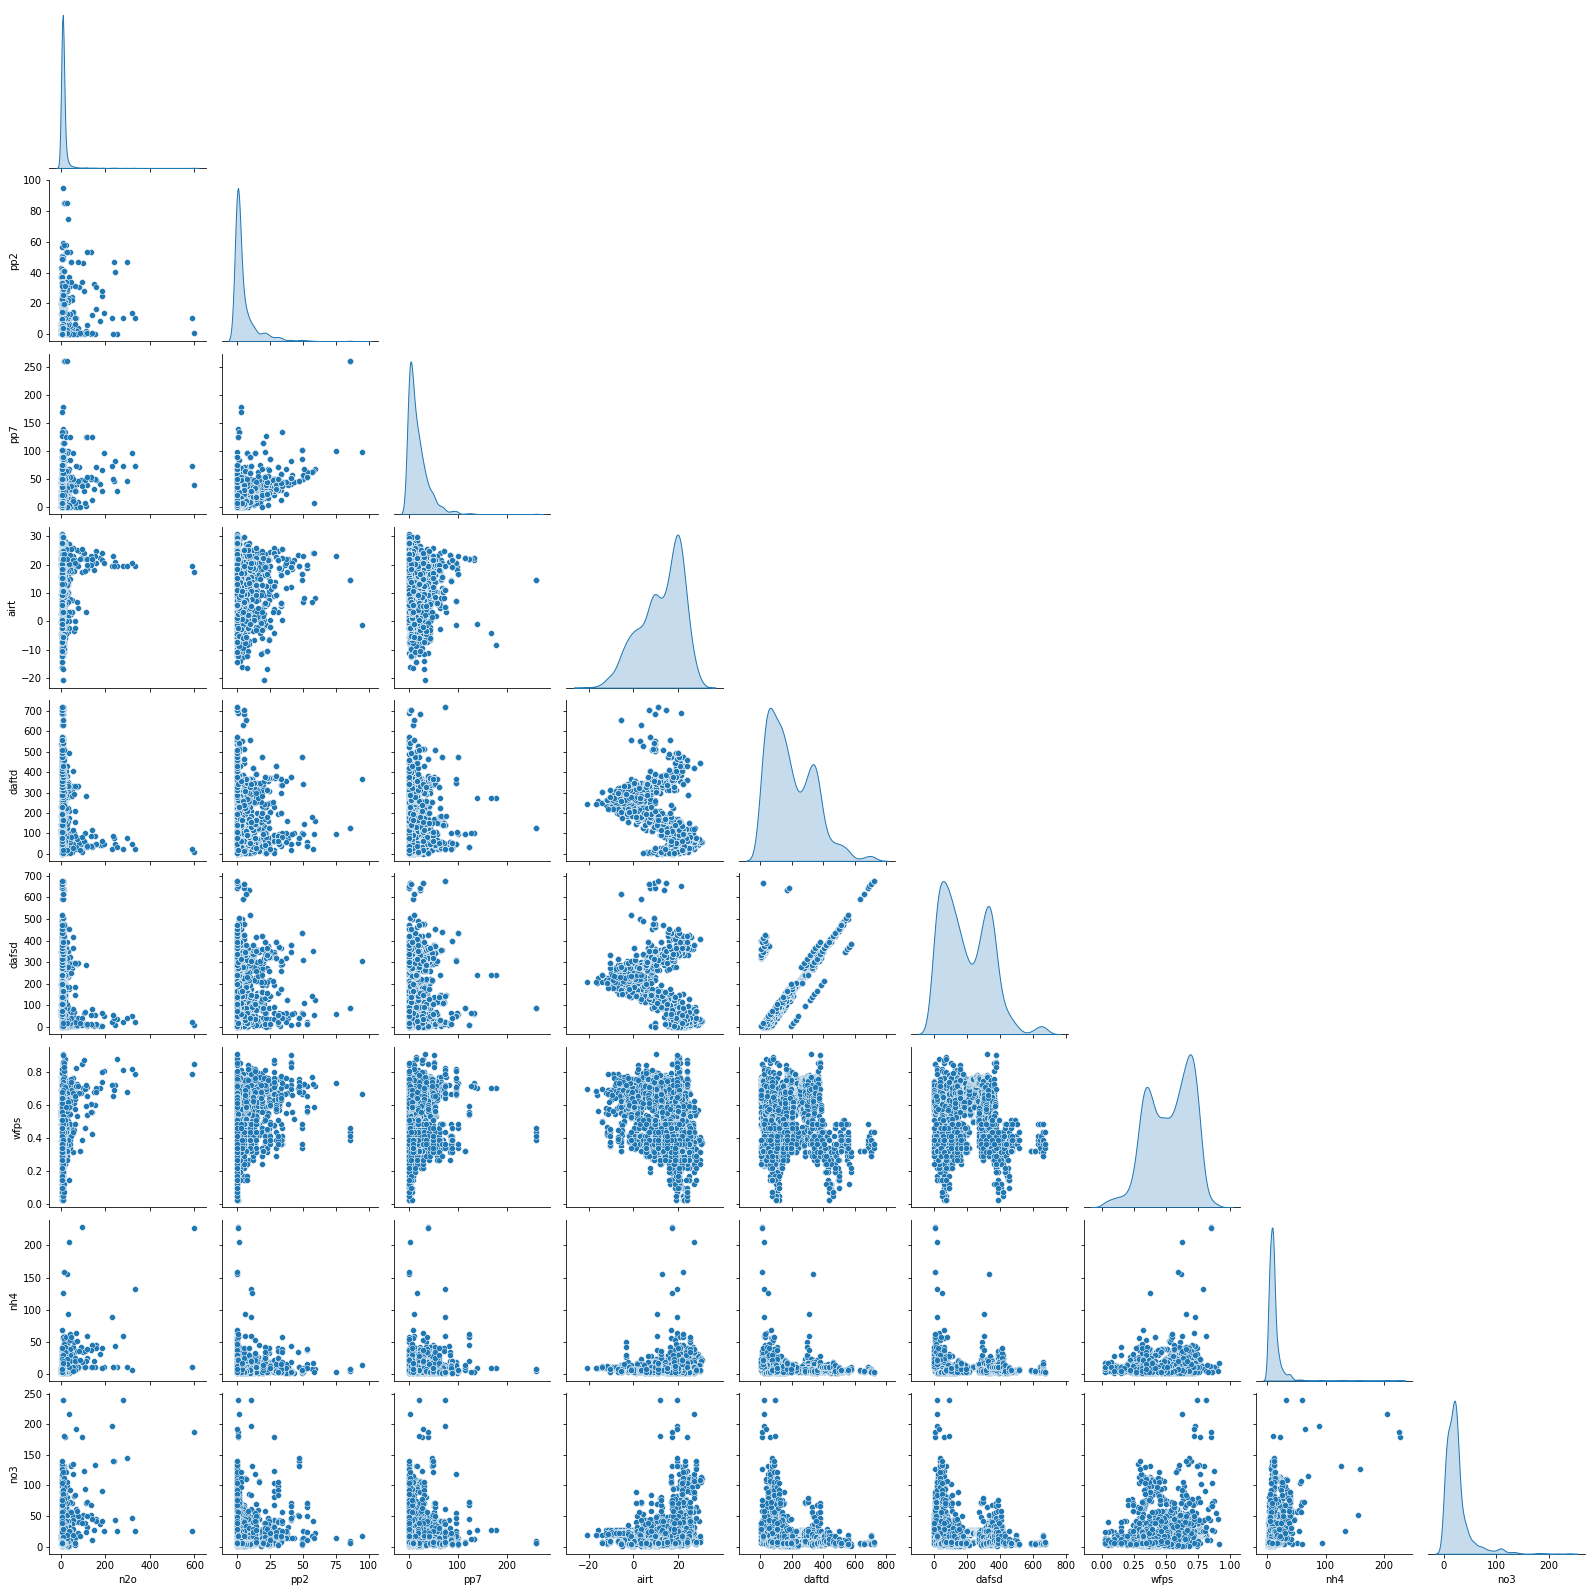

In [39]:
# Checking the distribution of numerical features
sns.pairplot(df_num, diag_kind='kde', corner=True)
plt.show()

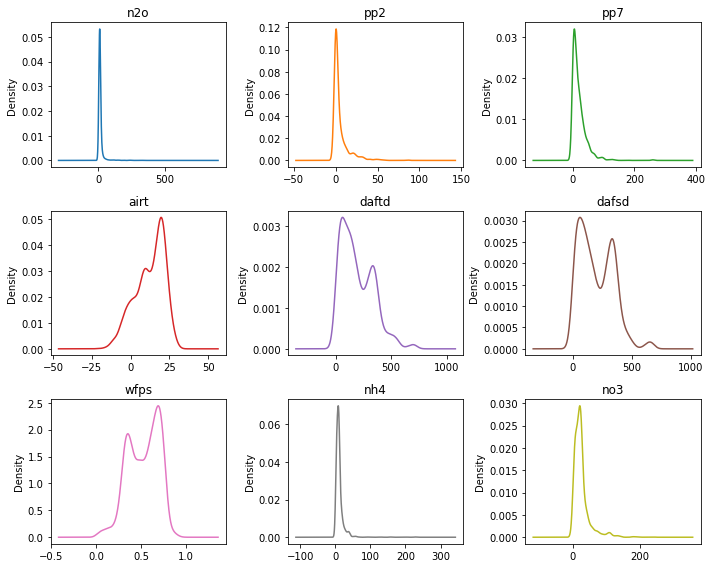

In [40]:
# Density plots of numerical data
df_num.plot(kind='kde', 
            subplots=True, 
            layout=(3,3), 
            sharex=False,
            figsize=(10,8),
            title=list(df_num.columns),
            legend=False
           )
plt.tight_layout()

##### Observations:
* 'airt' is slightly left skewed
* 'daftd', 'dafsd' and 'wfps' are bimodal.
* 'n2o', 'pp2', 'pp7', 'nh4' and 'no3' are right skewed
* 'daftd' and 'dafsd' are highly correlated

In [41]:
# Replacing 'daftd' and 'dafsd' with average days after nitrogen fertilization 'mean_daf'
df_num['mean_daf'] = (df_num['daftd'] + df_num['dafsd'])*0.5
df_num = df_num.drop(columns=['daftd', 'dafsd'], axis=1)
df_num.head()

<ipython-input-41-fdeb674ce234>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



n2o   pp2   pp7  airt      wfps        nh4        no3  mean_daf
0  11.312038  0.00  0.00  -2.0  0.666508  11.046340  22.940812     258.5
1   9.605514  0.00  0.00  -2.4  0.640608  11.008087  22.959578     259.5
2  10.957891  3.30  8.64   0.3  0.728085  10.831669  23.221928     267.5
3  10.758166  0.00  8.13  -3.8  0.686872  10.849792  23.271978     268.5
4  10.363075  1.02  8.39  17.6  0.716221  10.204748  24.206855     294.5

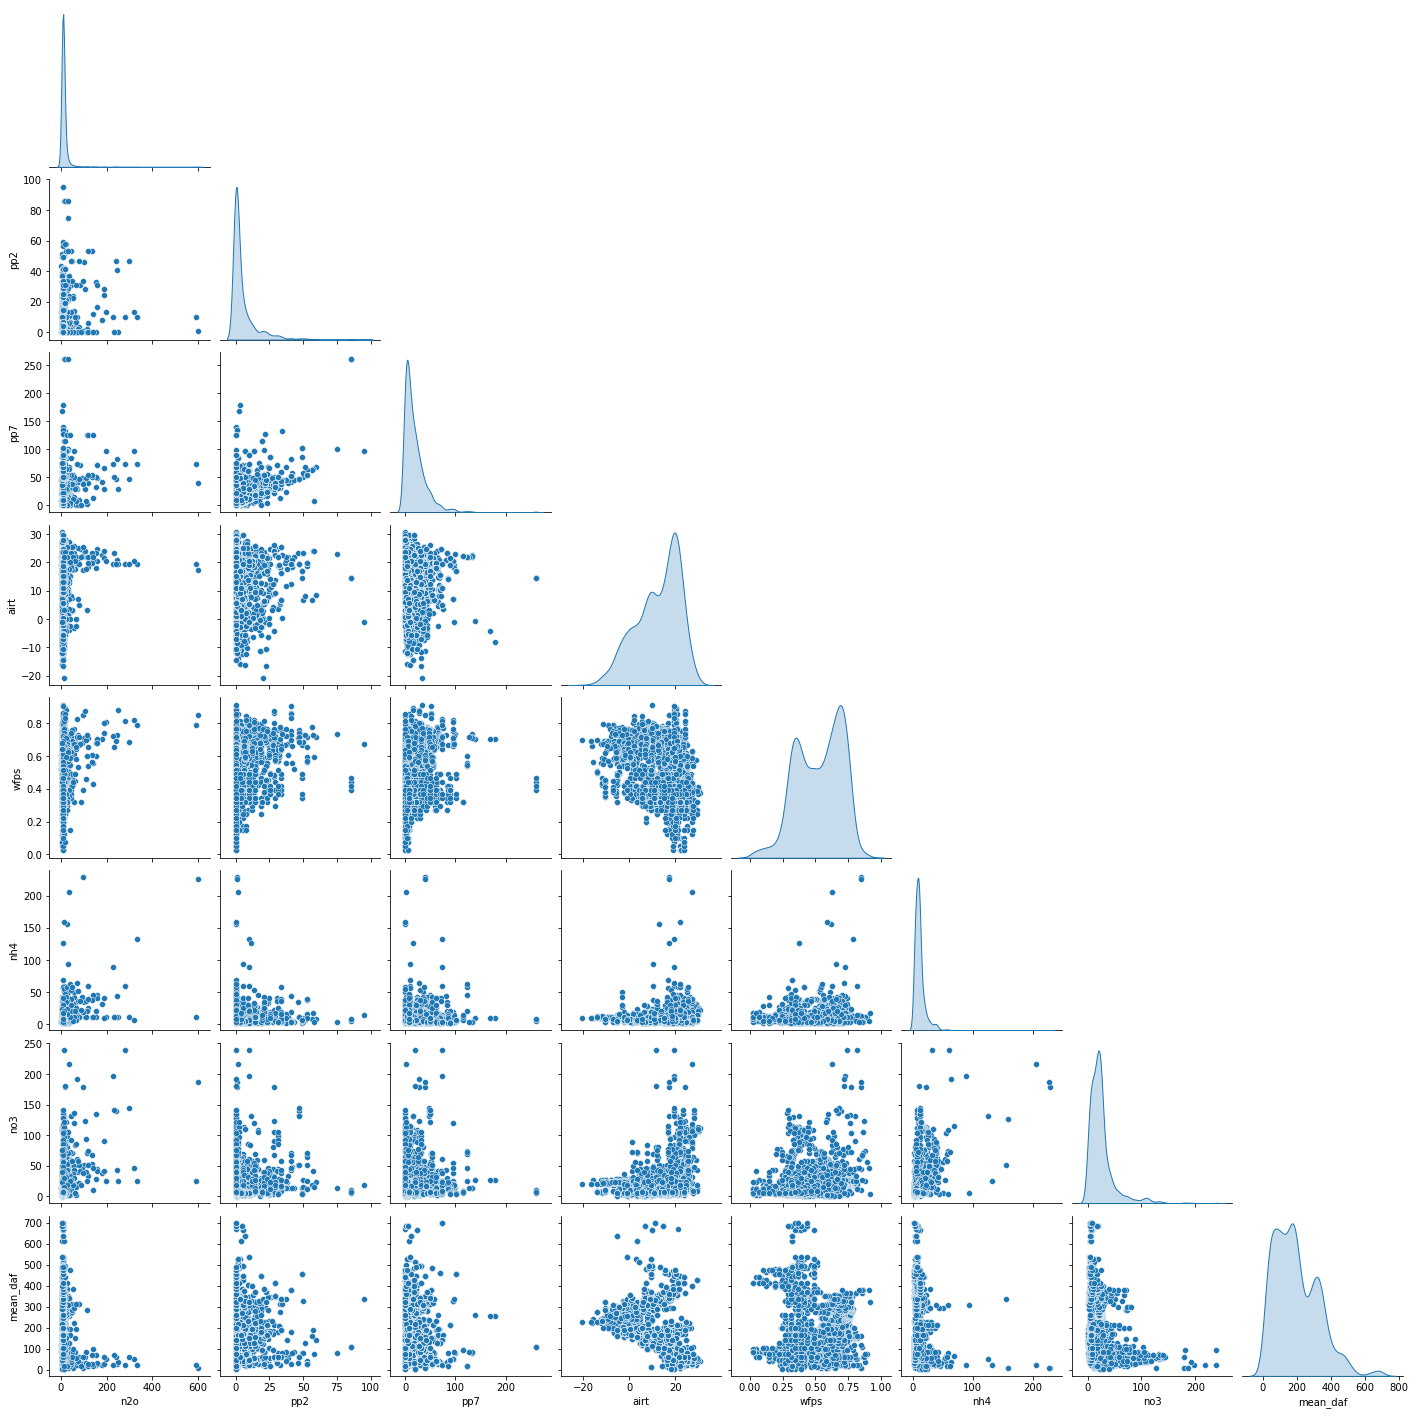

In [42]:
# Checking the distribution of numerical features
sns.pairplot(df_num, diag_kind='kde', corner=True)
plt.show()

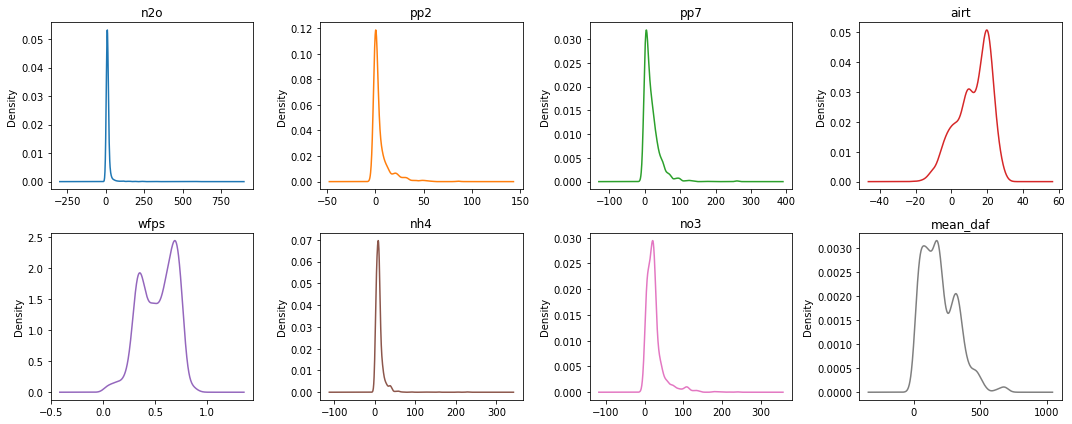

In [43]:
# Density plots of numerical data
df_num.plot(kind='kde', 
            subplots=True, 
            layout=(2,4), 
            sharex=False,
            figsize=(15,6),
            title=list(df_num.columns),
            legend=False
           )
plt.tight_layout()

     ===================================  Distribution of Numerical Features across Target  ===================================


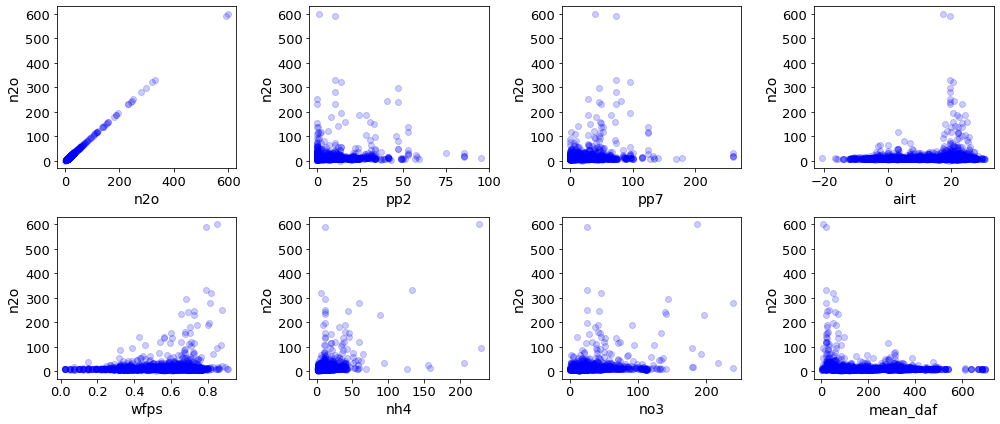

In [44]:
# Checking for any relationship of numerical features with the target
print("    ","="*35, "\033[1m Distribution of Numerical Features across Target \033[0m", "="*35)
plt.figure(figsize=(14,6))
plotnumber=1

for col in df_num:
    if plotnumber < 10:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(data=df_num, x=col, y='n2o', color='b', alpha=0.2)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('n2o', fontsize=14)
    plotnumber +=1
plt.tight_layout()

##### Observations:
* There is no linear relationship between numerical features and the target.
* 'n2o' =  value above 600 is an outlier of concern.
* 'pp2' = values near to 80 and above are outliers of concern
* 'pp7' = values above 250 are outliers of concern
* 'nh4' = values above 100 are outliers of concern
* 'no3' = values near to 200 and above are outliers of concern

### Transforming Numerical features

In [45]:
# Separating positively and negatively skewed features
# Keeping a threshold of skewness=0.7 for identifying positively and negatively skewed features

positively_skewed = [feat for feat in df_num.columns if df_num[feat].skew()>0.7]
negatively_skewed = [feat for feat in df_num.columns if df_num[feat].skew()<-0.7]
print("\033[1m Positively skewed features: \033[0m", positively_skewed)
print("\n\033[1m Negatively skewed features: \033[0m",negatively_skewed)

 Positively skewed features:  ['n2o', 'pp2', 'pp7', 'nh4', 'no3', 'mean_daf']

 Negatively skewed features:  []


In [46]:
# Checking for outliers
skewed_features = positively_skewed + negatively_skewed

outlier_dict={}

for feat in df_num.columns:
    if feat in skewed_features:
        # Applying IQR for identifying outliers for skewed features
        q1 = df_num[feat].quantile(0.25)
        q3 = df_num[feat].quantile(0.75)
        iqr = q3 - q1
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
        outlier_count = np.sum(df_num[feat]>upper)+np.sum(df_num[feat]<lower)
    else:
        # Applying 3 standard deviations for normally distributed features
        feat_mean = np.mean(df_num[feat])
        feat_stdev = np.std(df_num[feat])
        upper = feat_mean+(3*feat_stdev)
        lower = feat_mean-(3*feat_stdev)
        outlier_count = np.sum(df_num[feat]>upper)+np.sum(df_num[feat]<lower)
    outlier_dict[feat]=outlier_count
    
for feat,count in outlier_dict.items():
    print("Outliers in \033[1m'{}'\033[0m: {} %\n".format(feat, (count*100/df.shape[0]).round(2)))

Outliers in 'n2o': 11.18 %

Outliers in 'pp2': 10.86 %

Outliers in 'pp7': 5.08 %

Outliers in 'airt': 0.13 %

Outliers in 'wfps': 0.0 %

Outliers in 'nh4': 9.57 %

Outliers in 'no3': 8.9 %

Outliers in 'mean_daf': 1.07 %



In [47]:
# Boxplot of Numerical features
fig = make_subplots(rows=2, cols=4, 
                    subplot_titles=list(df_num.columns),
                    vertical_spacing=0.1
                   )

rnum=1
cnum=1

for feat in df_num.columns:
    fig.add_trace(go.Box(y=df_num[feat]), row=rnum, col=cnum)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(showlegend=False,
                      title=dict(text="Numerical Features before transformation of skewed features",
                                 x=0.5),
                      template='ggplot2',
                      width=900, 
                      height=800,
                      margin=dict(b=0.2)
                     )
    cnum += 1
    if cnum>4:
        cnum = 1
        rnum += 1
    
fig.show()

In [48]:
# Applying log transformation on positively skewed features

for feat in positively_skewed:
    df_num[feat] = np.log1p(df_num[feat])

In [49]:
# Boxplot of Numerical features
fig = make_subplots(rows=2, cols=4, 
                    subplot_titles=list(df_num.columns),
                    vertical_spacing=0.1
                   )

rnum=1
cnum=1

for feat in df_num.columns:
    fig.add_trace(go.Box(y=df_num[feat]), row=rnum, col=cnum)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(showlegend=False,
                      title=dict(text="Numerical Features after transformation of skewed features",
                                 x=0.5),
                      template='ggplot2',
                      width=900, 
                      height=800,
                      margin=dict(b=0.2)
                     )
    cnum += 1
    if cnum>4:
        cnum = 1
        rnum += 1
    
fig.show()

In [50]:
# Winsorizing the data
for feat in positively_skewed:
    q1 = df_num[feat].quantile(0.25)
    q3 = df_num[feat].quantile(0.75)
    iqr = q3 - q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    df_num[feat] = np.where(df_num[feat]>upper, upper, np.where(df_num[feat]<lower, lower, df_num[feat]))

In [51]:
# Boxplot of Numerical features
fig = make_subplots(rows=2, cols=4, 
                    subplot_titles=list(df_num.columns),
                    vertical_spacing=0.1
                   )

rnum=1
cnum=1

for feat in df_num.columns:
    fig.add_trace(go.Box(y=df_num[feat]), row=rnum, col=cnum)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(showlegend=False,
                      title=dict(text="Numerical Features after transformation and Winsorization of skewed features",
                                 x=0.5),
                      template='ggplot2',
                      width=900, 
                      height=800,
                      margin=dict(b=0.2)
                     )
    cnum += 1
    if cnum>4:
        cnum = 1
        rnum += 1
    
fig.show()

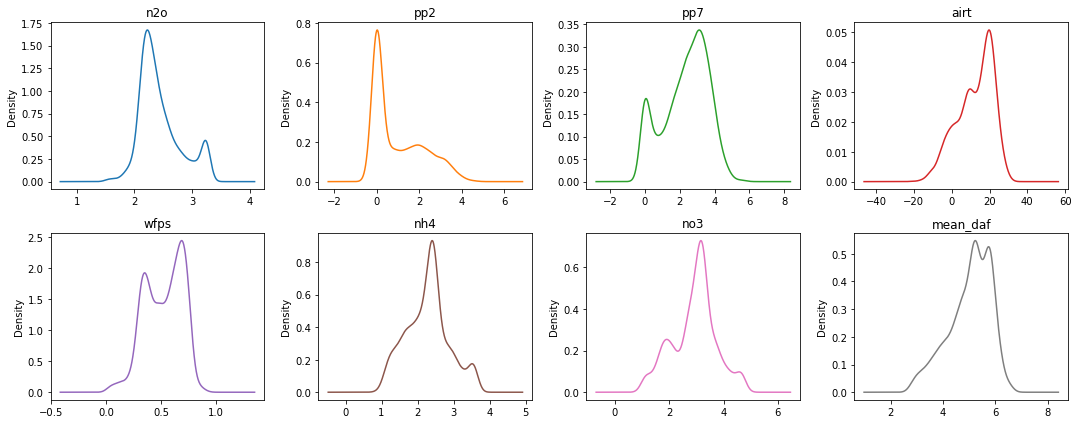

In [52]:
# Density plots of transformed numerical data
df_num.plot(kind='kde', 
            subplots=True, 
            layout=(2,4), 
            sharex=False,
            figsize=(15,6),
            title=list(df_num.columns),
            legend=False
           )

plt.tight_layout()

   ==============================  Distribution of transformed Numerical Features across Target  ==============================


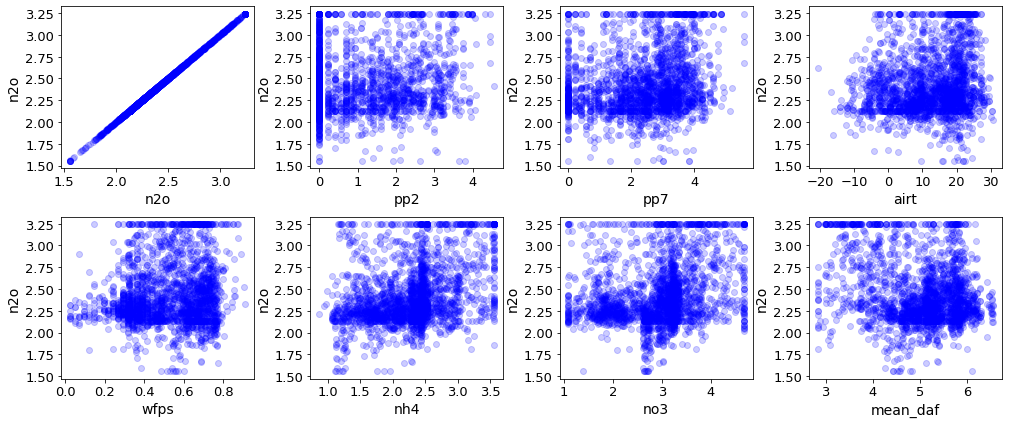

In [53]:
# Checking for any relationship of numerical features with the target
print("  ","="*30, "\033[1m Distribution of transformed Numerical Features across Target \033[0m", "="*30)
plt.figure(figsize=(14,6))
plotnumber=1

for col in df_num:
    if plotnumber < 10:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(data=df_num, x=col, y='n2o', color='b', alpha=0.2)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('n2o', fontsize=14)
    plotnumber +=1
plt.tight_layout()

In [54]:
# Checking for outliers
outlier_dict={}

for feat in df_num.columns:
    if feat in skewed_features:
        # Applying IQR for identifying outliers for skewed features
        q1 = df_num[feat].quantile(0.25)
        q3 = df_num[feat].quantile(0.75)
        iqr = q3 - q1
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
        outlier_count = np.sum(df_num[feat]>upper)+np.sum(df_num[feat]<lower)
    else:
        # Applying 3 standard deviations for normally distributed features
        feat_mean = np.mean(df_num[feat])
        feat_stdev = np.std(df_num[feat])
        upper = feat_mean+(3*feat_stdev)
        lower = feat_mean-(3*feat_stdev)
        outlier_count = np.sum(df_num[feat]>upper)+np.sum(df_num[feat]<lower)
    outlier_dict[feat]=outlier_count
    
for feat,count in outlier_dict.items():
    print("Outliers in \033[1m'{}'\033[0m: {} %\n".format(feat, (count*100/df.shape[0]).round(2)))

Outliers in 'n2o': 0.0 %

Outliers in 'pp2': 0.0 %

Outliers in 'pp7': 0.0 %

Outliers in 'airt': 0.13 %

Outliers in 'wfps': 0.0 %

Outliers in 'nh4': 0.0 %

Outliers in 'no3': 0.0 %

Outliers in 'mean_daf': 0.0 %



### Categorical Features

In [55]:
# Categorical features dataset
# All features in df that are not in numerical features and excluding 'daftd' and 'dafsd' which were converted to 'mean_daf'
df_cat = df[[col for col in df if col not in df_num]].drop(columns=['daftd', 'dafsd'], axis=1)
df_cat.sample(5)

month    veg nrate clay sand som
761      March   Corn   170   62  637   1
2197   January  TRIAE    91  169  418   1
1207       May   Corn   135  260   55   3
1562   October   Corn   202  270   60   4
3     February   Corn   170   62  637   1

In [56]:
# Descriptive stats of categorical features
df_cat.describe().T

count unique   top  freq
month  2246     12  July   285
veg    2246      3  Corn  1845
nrate  2246     16   170  1107
clay   2246     10    62  1094
sand   2246      9   637  1094
som    2246      3     1  1764

##### Observations:
* Corn was the most used crop for the study and constitutes more than 80% of all crops used.
* Most of the data was recorded in the month of July.

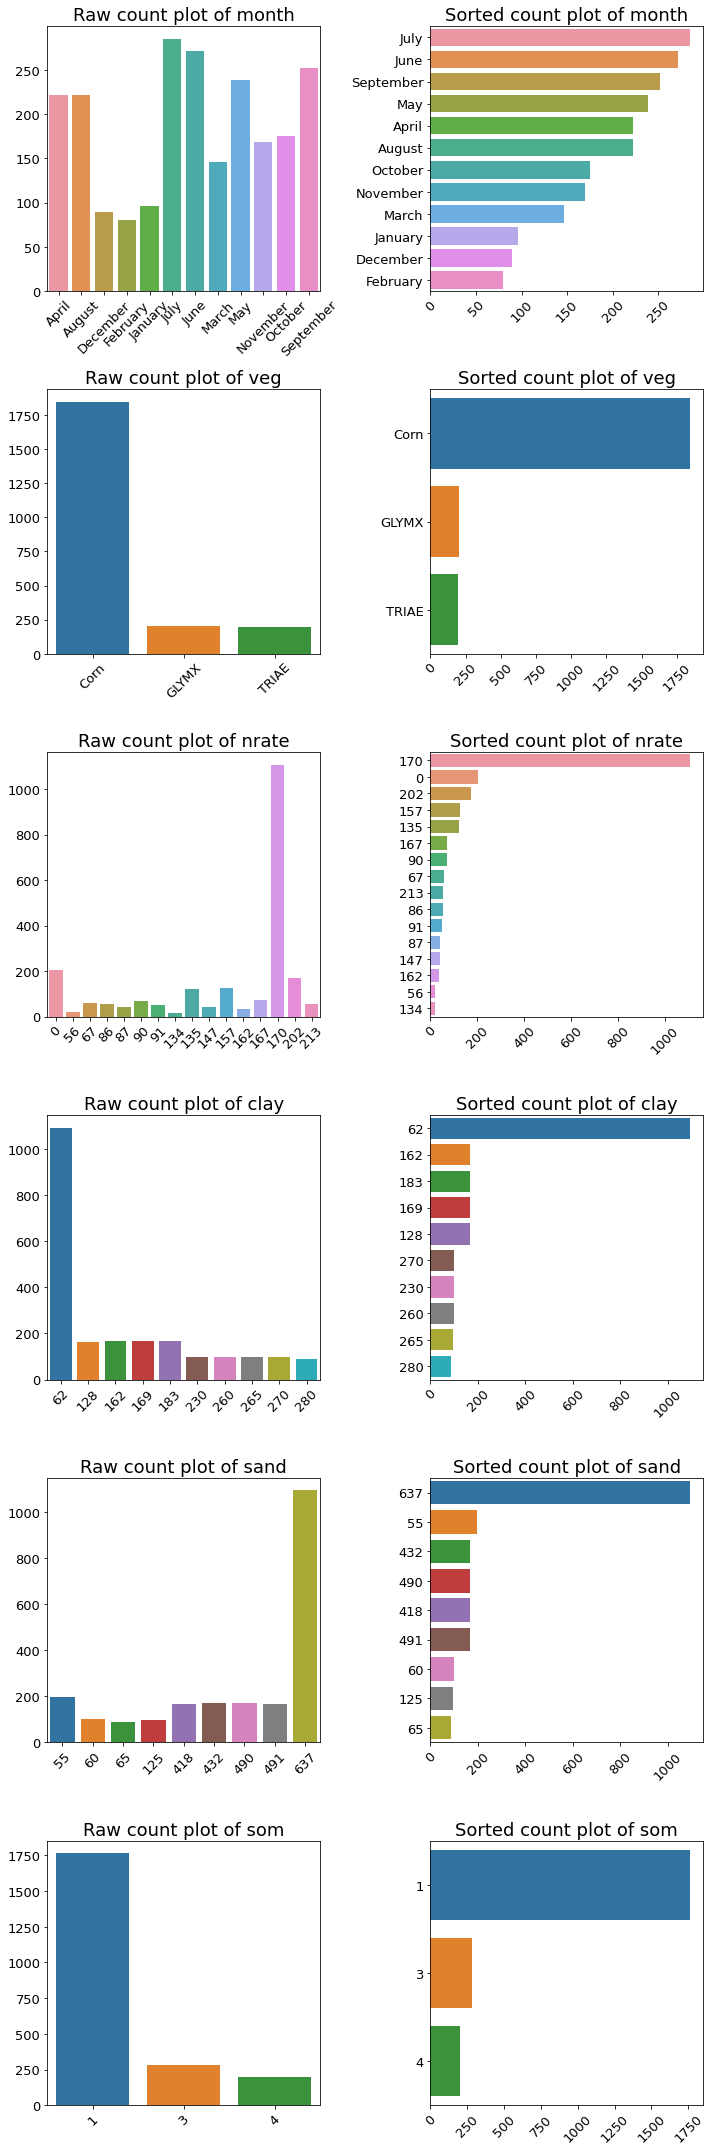

In [57]:
# Plotting Categorical features distribution
plt.figure(figsize=(10,30))
plotnumber=1

for col in df_cat:
    if plotnumber < 12:
        ax1 = plt.subplot(6,2,plotnumber)
        sns.countplot(data=df_cat, x=col)
        plt.xticks(fontsize=13, rotation=45)
        plt.yticks(fontsize=13)
        plt.title(f"Raw count plot of {col}", fontsize=18)
        plt.xlabel('')
        plt.ylabel('')
        
        ax2 = plt.subplot(6,2,plotnumber+1)
        sns.countplot(data=df_cat, y=col, order=df_cat[col].value_counts().index)
        plt.xticks(fontsize=13, rotation=45)
        plt.yticks(fontsize=13)
        plt.title(f"Sorted count plot of {col}", fontsize=18)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=2
plt.tight_layout()

##### Observations:
* Highest number of observations was taken on July followed by June. A seasonal pattern can be observed on months.


* GLYMX(soybean) and TRIAE(wheat) combined represents only near about 20% of the total crop data.


* 170 kg/ha was the highest recorded nitrogen fertilizer application rate across the data.


* 62 g/kg of clay has the highest number of observations. A clear decreasing pattern of observations is visible per 100 g/kg of clay.


* 637 g/kg of sand has the highest number of observations. Though second highest observations for sand is at 55 g/kg, an increasing pattern can be observed for quantities higher than 55 g/kg.


* 1% soil organic matter constitutes highest number (78%) of observations. A decreasing trend can be observed thereafter.

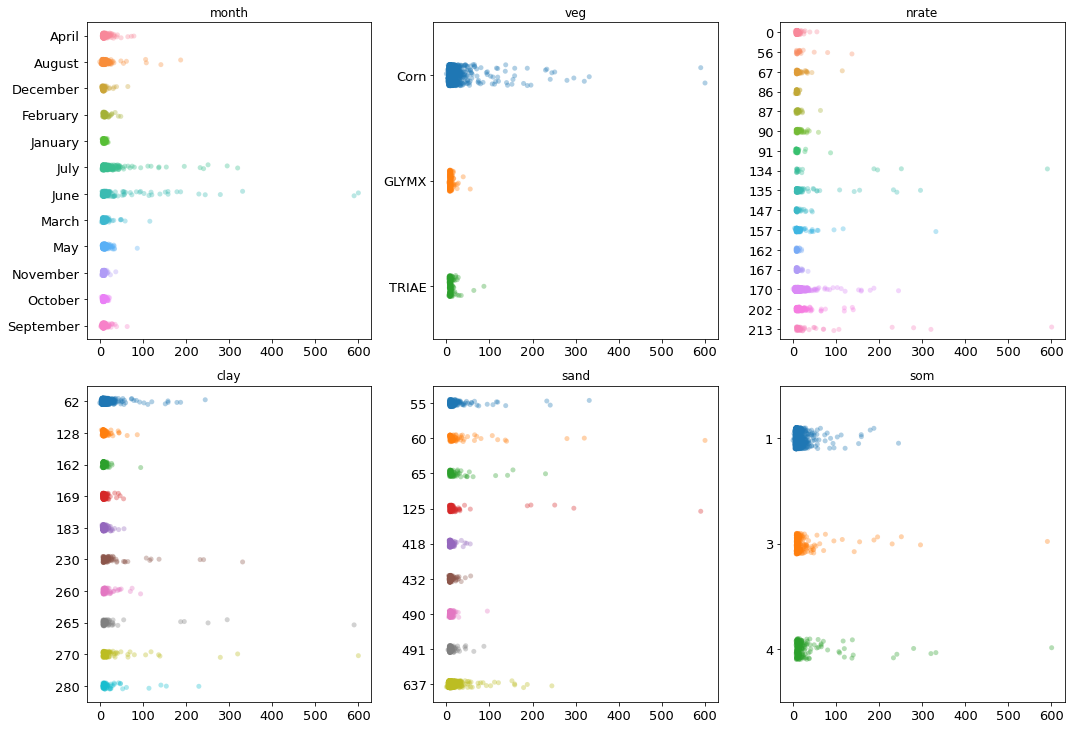

In [58]:
# Plotting Categorical features distribution across raw 'n2o'
plt.figure(figsize=(15,15))
plotnumber=1

for col in df_cat:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y=df_cat[col], x=df['n2o'], alpha=0.35)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col)
    plotnumber +=1
plt.tight_layout()

##### Observations:
* June and July months followed by August contributes to highest 'n2o' concentrations and exhibits an observable correlation with 'n2o'.


* Corn produces more 'n2o' compared to soybean and wheat. Though no relationship can be observed for wheat and soybean with 'n2o', a significant change of pattern is visible for corn and other 'veg' with 'n2o'.


* nrates of 134-157 and 170+ contributes more towards 'n2o' concentrations. Higher values of 'nrate'(above 170) indicates higher 'n2o' concentrations.


* soil with 62 or 230+ g/kg clay contributes more to 'n2o' concentrations. A relationship can be observed for clay values above and below 230 with 'n2o'.


* 55-125 g/kg of sand in soil contributes more to 'n2o' concentrations. A relationship can be observed for sand values above and below 125 with 'n2o'.


* Increase in soil organic matter in propotion to higher 'n2o' concentrations can be observed. Though the difference is negligible between 3-4%, a considerable difference exits between 1-3% of soil organic matter.

In [59]:
# Correlation among categorical variables

from scipy.stats import chi2_contingency
        
feat1 = []
feat2 = []
p_val = []

features = list(df_cat.columns)

for i in range(len(features)):
    for j in range(i):
        contingency_table = pd.crosstab(df_cat[features[i]], df_cat[features[j]])

        stat, p, dof, expected = chi2_contingency(contingency_table)

        if p <= 0.05 and p != 0:
            feat1.append(features[i])
            feat2.append(features[j])
            p_val.append(p)

feat_combo = list(zip(feat1, feat2))

df_catcorr = pd.DataFrame({"Feature 1": feat1, "Feature 2": feat2, "P-Value": p_val}).sort_values('P-Value')
print("="*10, "\033[1m Highly Correlated Categorical Features \033[0m", "="*10)
df_catcorr

==========  Highly Correlated Categorical Features  ==========


Feature 1 Feature 2        P-Value
5      sand       veg  1.697398e-234
3      clay       veg  1.220527e-232
7       som       veg   7.352028e-28
1     nrate     month   3.946046e-13
4      sand     month   1.429764e-11
2      clay     month   1.193257e-09
0       veg     month   2.148422e-08
6       som     month   4.114900e-04

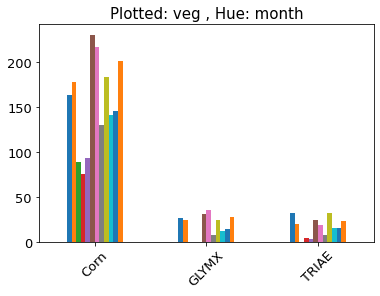

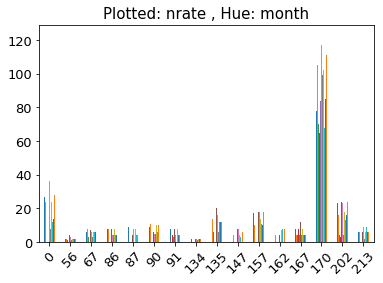

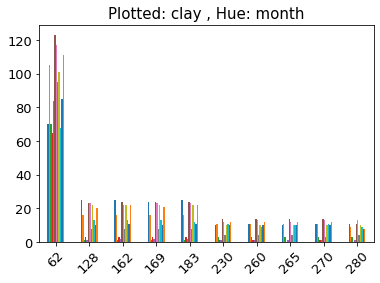

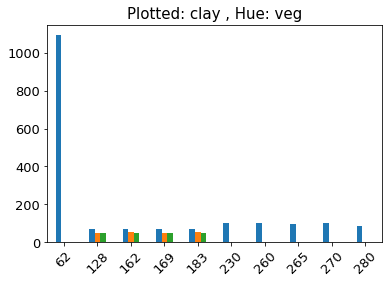

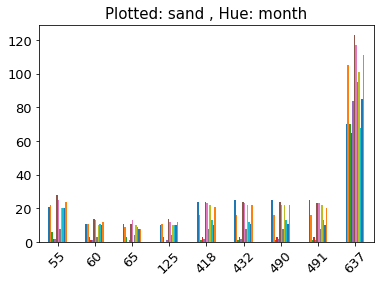

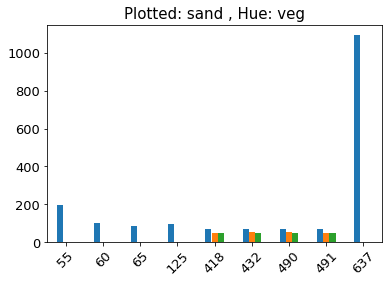

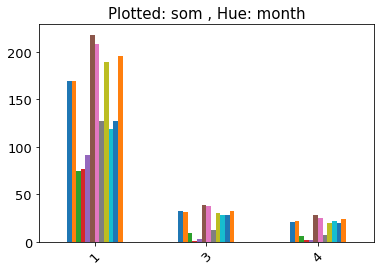

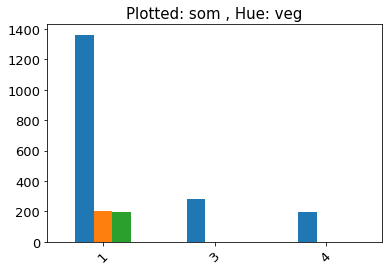

In [60]:
# Visualizing crosstab of correlated features
for item in feat_combo:
    i1 = item[0]
    i2 = item[1]
    pd.crosstab(index=df_cat[i1], columns=df_cat[i2]).plot(kind='bar', legend=False)
    plt.xticks(fontsize=13, rotation=45)
    plt.yticks(fontsize=13)
    plt.title(f"Plotted: {i1} , Hue: {i2}", fontsize=15)
    plt.ylabel("")
    plt.xlabel("")
    plt.show()

##### Observations:
* We can confirm that all the features are correlated since there exists no common pattern among the features in each chart.
* But, for now let's proceed ahead with these features.

### Transforming Categorical features

We will be transforming the categorical features with the following objectives:
1. Transformation adds more meaning to the feature.
2. Transformation helps with reducing feature cardinality.

* Since a seasonal pattern can be observed in 'month', we will group the classes based on season.
* Binarize 'veg' into: Corn and Other 
* Binarize 'nrate' into: <170 and 170+
* Group 'clay' into 3 groups: 62=low, 62-128=medium, 128 and above = high
* Group 'sand' into 3 groups: 125=low, 125-637=medium, 637 and above = high
* Binarize 'som' into 1% and Above1%

In [61]:
# Binning months to seasons
season_map = {'January':'Winter',
                  'February':'Winter',
                  'March':'Spring',
                  'April':'Spring',
                  'May':'Spring',
                  'June':'Summer',
                  'July':'Summer',
                  'August':'Summer',
                  'September':'Fall',
                  'October':'Fall',
                  'November':'Fall',
                  'December':'Winter'}
df_cat['month'] = df_cat['month'].map(season_map)
# renaming month to season
df_cat = df_cat.rename(columns = {'month':'season'})
# Checking the classes
df_cat['season'].value_counts()

Summer    778
Spring    607
Fall      596
Winter    265
Name: season, dtype: int64

In [62]:
# Binarizing veg
df_cat['veg'] = np.where(df_cat['veg']=='Corn', 'Corn', 'Other')
df_cat['veg'].value_counts()

Corn     1845
Other     401
Name: veg, dtype: int64

In [63]:
# Binarizing nrate
df_cat['nrate']  = df_cat['nrate'].astype('int') # converting to 'int'

def bin_nrate(x): # function for mapping values
    if x < 170:
        return 'low'
    else:
        return 'high'
    
df_cat['nrate'] = df_cat['nrate'].apply(bin_nrate)
df_cat['nrate'].value_counts()

high    1335
low      911
Name: nrate, dtype: int64

In [64]:
# Binning clay
df_cat['clay']  = df_cat['clay'].astype('int') # converting to 'int'

def bin_clay(x): # function for mapping values
    if x <= 62:
        return 'low'
    elif (x>62) and (x<=128):
        return 'medium'
    else:
        return 'high'
    
df_cat['clay'] = df_cat['clay'].apply(bin_clay)
df_cat['clay'].value_counts()

low       1094
high       987
medium     165
Name: clay, dtype: int64

In [65]:
# Binning sand
df_cat['sand']  = df_cat['sand'].astype('int') # converting to 'int'

def bin_sand(x): # function for mapping values
    if x <= 125:
        return 'low'
    elif (x>125) and (x<=491):
        return 'medium'
    else:
        return 'high'
    
df_cat['sand'] = df_cat['sand'].apply(bin_sand)
df_cat['sand'].value_counts()

high      1094
medium     670
low        482
Name: sand, dtype: int64

In [66]:
# Binarizing 'som'
df_cat['som'] = np.where(df_cat['som'] == 1, '1%', 'Above 1%')
df_cat['som'].value_counts()

1%          1764
Above 1%     482
Name: som, dtype: int64

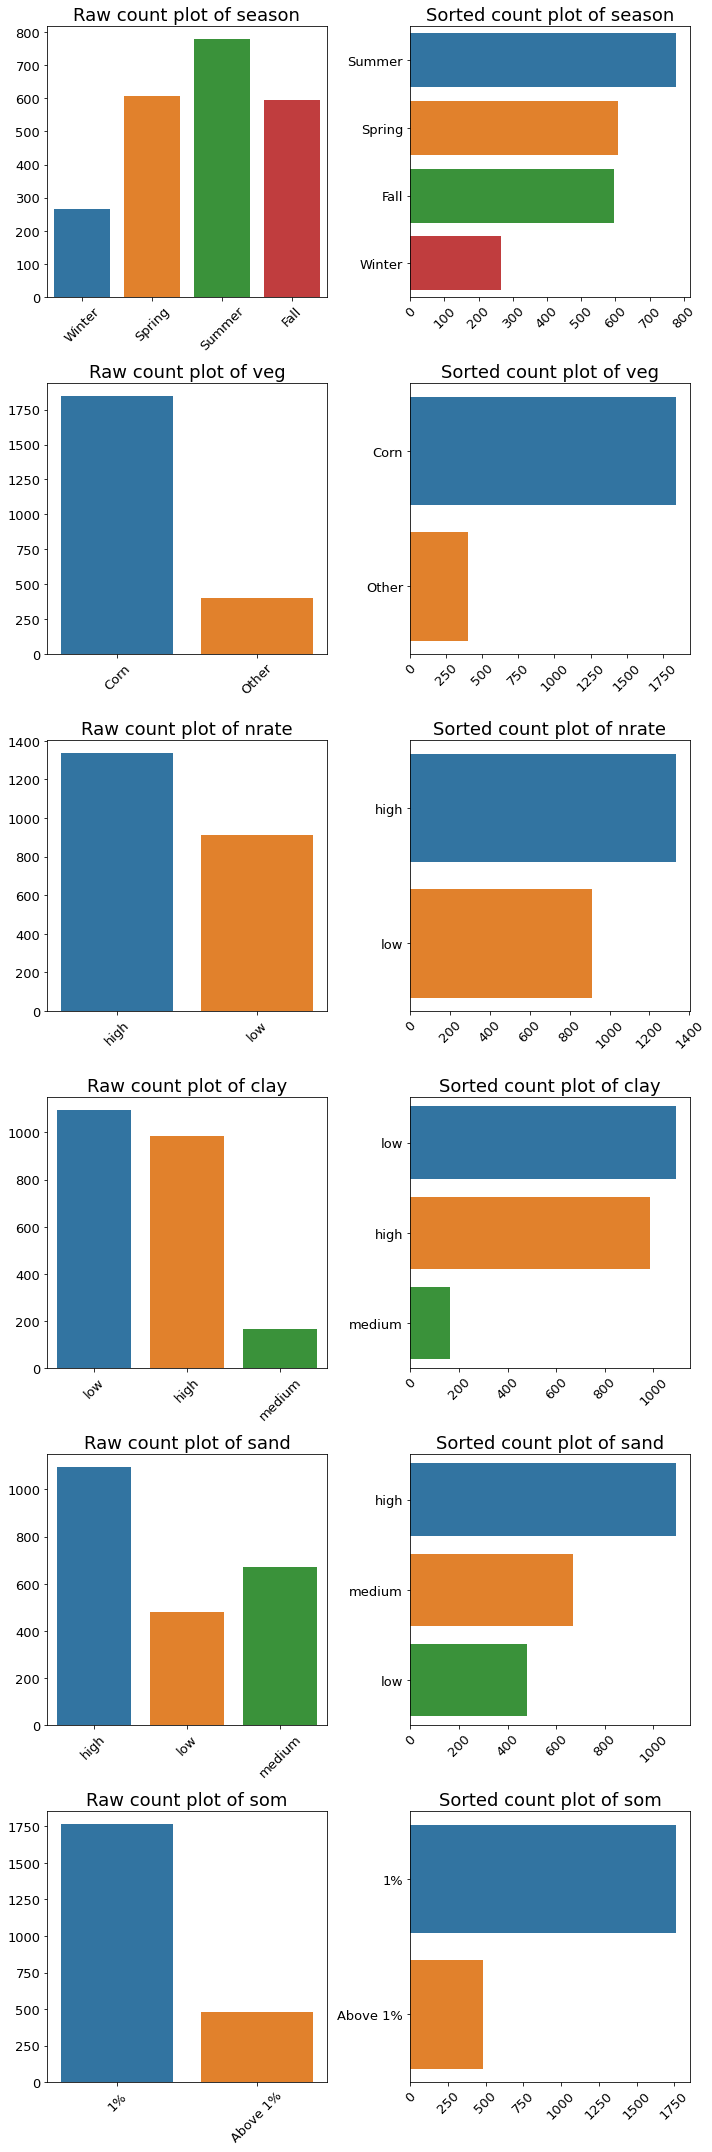

In [67]:
# Plotting Categorical features distribution
plt.figure(figsize=(10,30))
plotnumber=1

for col in df_cat:
    if plotnumber < 12:
        ax1 = plt.subplot(6,2,plotnumber)
        sns.countplot(data=df_cat, x=col)
        plt.xticks(fontsize=13, rotation=45)
        plt.yticks(fontsize=13)
        plt.title(f"Raw count plot of {col}", fontsize=18)
        plt.xlabel('')
        plt.ylabel('')
        
        ax2 = plt.subplot(6,2,plotnumber+1)
        sns.countplot(data=df_cat, y=col, order=df_cat[col].value_counts().index)
        plt.xticks(fontsize=13, rotation=45)
        plt.yticks(fontsize=13)
        plt.title(f"Sorted count plot of {col}", fontsize=18)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=2
plt.tight_layout()

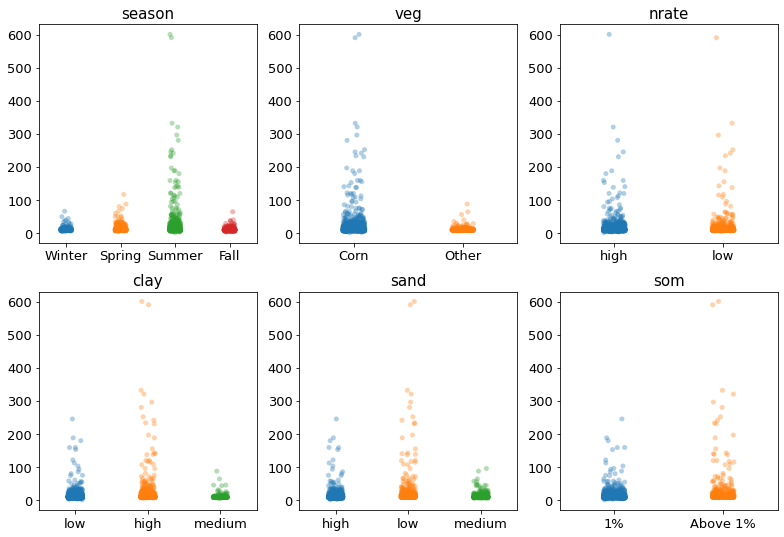

In [68]:
# Plotting Categorical features distribution across raw 'n2o'
plt.figure(figsize=(11,11))
plotnumber=1

for col in df_cat:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=df_cat[col], y=df['n2o'], alpha=0.35)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col, fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [69]:
df_final = pd.concat([df_num, df_cat], axis=1)
df_final.head()

n2o       pp2       pp7  airt      wfps       nh4       no3  mean_daf  \
0  2.510578  0.000000  0.000000  -2.0  0.666508  2.488761  3.175585  5.558757   
1  2.361374  0.000000  0.000000  -2.4  0.640608  2.485580  3.176368  5.562603   
2  2.481391  1.458615  2.265921   0.3  0.728085  2.470780  3.187258  5.592851   
3  2.464548  0.000000  2.211566  -3.8  0.686872  2.472310  3.189323  5.596568   
4  2.430369  0.703098  2.239645  17.6  0.716221  2.416338  3.227116  5.688669   

   season   veg nrate clay  sand som  
0  Winter  Corn  high  low  high  1%  
1  Winter  Corn  high  low  high  1%  
2  Winter  Corn  high  low  high  1%  
3  Winter  Corn  high  low  high  1%  
4  Spring  Corn  high  low  high  1%

# Summary of EDA:
### Dataset
* No of features:  2246
* No of observations:  21 
* Total missing values in the dataset:  158
* No of duplicate values in the dataset:  0 
* No of constant features:  1
* Constant features: **vegtype** 
* Features with variance < 0.1:  **wfps**

### Target variable
* Negative values present for nitrous oxide concentration. These are due to the conversion of nitrous oxide data between 0 and automated chamber's detection limit to 50% of the detection limit.
* 75% of the data is within 1 std deviation from the mean.
* Heavily right skewed data
* Two extreme outliers.

### Numerical features
* Most of the numerical data are right skewed and with extreme outliers.


* Almost half of the data were recorded when there was no rain 2 days prior to the date of recording.


* Nearly 10% of the data were recorded under freezing conditions and most of the data under cold climate.


* 'daftd', 'dafsd' and 'wfps' have a bimodal distribution.


* 'n2o', 'pp2', 'pp7', 'nh4' and 'no3' are right skewed


* 'daftd' and 'dafsd' are highly correlated with each other.


* There is **no linear relationship** between numerical features and the target.


* Positively skewed features:  \['n2o', 'pp2', 'pp7', 'nh4', 'no3', 'mean_daf'\]


* No Negatively skewed features


* Outliers in 'n2o': 11.18 %


* Outliers in 'pp2': 10.86 %


* Outliers in 'pp7': 5.08 %


* Outliers in 'airt': 3.21 %


* Outliers in 'wfps': 2.76 %


* Outliers in 'nh4': 9.57 %


* Outliers in 'no3': 8.9 %


* Outliers in 'mean_daf': 1.07 %


### Categorical features
* Corn was the most used crop for the study and constitutes more than 80% of all crops used. GLYMX(soybean) and TRIAE(wheat) combined represents only near about 20% of the total crop data in the dataset. Corn produces higher rates of nitrous oxide compared to soybean and wheat. Though no relationship can be observed for wheat and soybean with 'n2o', a significant change of pattern is visible for corn and other 'veg' with 'n2o'.


* Highest number of observations was taken on July followed by June. A seasonal pattern can be observed between 'n2o' concentration and month. June and July months followed by August contributes to highest 'n2o' concentrations and exhibits an observable correlation with 'n2o'.


* 170 kg/ha was the highest recorded nitrogen fertilizer application rate across the data. Rates of 134-157kg/ha and more than 170kg/ha contributes more towards nitrous oxide concentrations. Higher values of 'nrate'(above 170) contributes towards higher 'n2o' concentrations.


* Highest number of observations were recorded for 62 g/kg of clay. A clear decreasing pattern of observations is visible per 100 g/kg of clay. Soil with 62 or 230+ g/kg clay contributes more to nitrous oxide concentrations. A relationship can be observed for clay values above and below 230 with 'n2o'.


* Highest number of observations were recorded for 637 g/kg of sand. Though second highest observations for sand is at 55 g/kg, an increasing pattern can be observed for quantities higher than 55 g/kg. 55-125 g/kg of sand in soil contributes more to 'n2o' concentrations. A relationship can be observed for sand values above and below 125 with 'n2o'.


* Highest number of observations recorded for 1% soil organic matter. A decreasing trend can be observed thereafter. Increase in soil organic matter in propotion to higher 'n2o' concentrations can be observed. Though the difference is negligible between 3-4%, a considerable difference exits between 1-3% of soil organic matter.

# Verifying the observations using autoEDA

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# Summary of transformations to be performed
* Drop columns = 'date', 'year', 'exp', 'datause', 'rep', 'vegtype'
* Type conversion 
    1. To category = 'month', 'veg'
    2. To int = 'nrate', 'clay', 'sand', 'som'
* 'n2o'  = 'n2o' + abs(min(n2o))
* Missing value imputation
    1. wfps = 0.321753
    2. nh4, no3 = mean
* New feature = 'mean_daf'
* Drop features = 'dafsd', 'daftd'
* Log transformation + Winsorization = 'n2o', 'pp2', 'pp7', 'nh4', 'no3', 'mean_daf'
* Binarize
    1. 'veg' - Corn, Other
    2. 'nrate' - <170 = low, high
    3. 'som' - ==1% = 1%, Above 1%
* Binning
    1. 'clay' - <=62 = low, 62<clay<=128 = medium, high
    2. 'sand' - <=125 = low, 125<sand<=491 = medium, high